In [1]:
import os
dataset = 'Dataset/ChildData/OUTPUTFOLDER/'
print(os.listdir(dataset))

classes = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]
count = []

for folder in classes:
    folder_path = os.path.join(dataset, folder)
    num_image = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    count.append(num_image)
    print(f"{folder} = {num_image}")

['Fear', 'Sad', 'Angry', 'Test', 'Neutral', 'Surprised', 'Happiness', '.ipynb_checkpoints', 'Train', 'Disgust']
Fear = 7
Sad = 27
Angry = 8
Test = 0
Neutral = 28
Surprised = 13
Happiness = 33
.ipynb_checkpoints = 0
Train = 0
Disgust = 14


In [2]:
dataset = 'Dataset/ChildData/OUTPUTFOLDER/Train'
print(os.listdir(dataset))

classes = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]
count = []

for folder in classes:
    folder_path = os.path.join(dataset, folder)
    num_image = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    count.append(num_image)
    print(f"{folder} = {num_image}")

['Fear', 'Sad', 'Angry', 'Neutral', 'Surprised', 'Happiness', 'Disgust']
Fear = 5
Sad = 21
Angry = 6
Neutral = 22
Surprised = 10
Happiness = 26
Disgust = 11


In [3]:
dataset = 'Dataset/ChildData/OUTPUTFOLDER/Test/'
print(os.listdir(dataset))

classes = [folder for folder in os.listdir(dataset) if os.path.isdir(os.path.join(dataset, folder))]
count = []

for folder in classes:
    folder_path = os.path.join(dataset, folder)
    num_image = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    count.append(num_image)
    print(f"{folder} = {num_image}")

['Fear', 'Sad', 'Angry', 'Neutral', 'Surprised', 'Happiness', 'Disgust']
Fear = 2
Sad = 6
Angry = 2
Neutral = 6
Surprised = 3
Happiness = 7
Disgust = 3


In [4]:
import os
import glob
import torch
import torch.nn as nn
import torchvision.transforms as tt
import torchvision
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.utils.tensorboard import SummaryWriter
import pathlib
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

2025-03-01 19:03:01.359196: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-01 19:03:01.382545: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-01 19:03:01.389737: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-01 19:03:01.407871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-01 19:03:02.714022: W tensorflow/compiler/tf2

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
train_path = 'Dataset/ChildData/OUTPUTFOLDER/Train/'
test_path = 'Dataset/ChildData/OUTPUTFOLDER/Test/'

In [7]:
class CustomDataset(Dataset):
    def __init__(self, data_path, transform=None):
        """
        Args:
            data_path (str): Path to the dataset (train or test).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_path = data_path
        self.transform = transform

        # Get all class subfolders (e.g., 'Angry', 'Disgust', etc.)
        self.class_names = sorted(os.listdir(data_path))  # Assumes class names are folder names
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(self.class_names)}

        # Get image file paths along with corresponding labels
        self.image_paths = []
        self.labels = []

        for class_name in self.class_names:
            class_folder = os.path.join(data_path, class_name)
            if os.path.isdir(class_folder):
                for fname in os.listdir(class_folder):
                    if fname.endswith('.jpg'):
                        self.image_paths.append(os.path.join(class_folder, fname))
                        self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        # Return the number of images in the dataset
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load an image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        # Get the label (index of the class)
        label = self.labels[idx]

        # Apply the transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

In [8]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])

In [9]:
# Initialize dataset and dataloaders for training and testing
train_dataset = CustomDataset(data_path=train_path, transform=transform)
test_dataset = CustomDataset(data_path=test_path, transform=transform)

torch.Size([3, 224, 224])


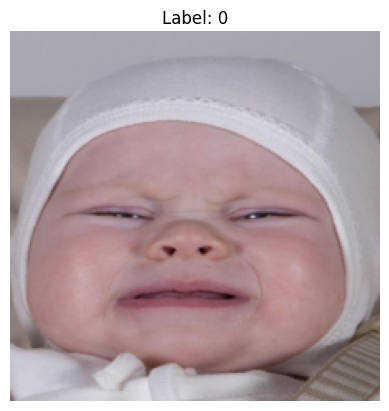

In [10]:
image_tensor, label = train_dataset[0][0].shape, train_dataset[0][1]

import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Assuming train_dataset[0][0] is the image tensor
image_tensor = train_dataset[0][0]  # Get the first image tensor from the dataset
label = train_dataset[0][1]  # Get the label for the first image

# Check the shape of the tensor to make sure it's [C, H, W]
print(image_tensor.shape)

# If your transform used normalization, reverse it like this:
mean = [0.485, 0.456, 0.406]  # Example for ImageNet
std = [0.229, 0.224, 0.225]

# Reverse the normalization
denormalize = transforms.Normalize(mean=[-m/s for m, s in zip(mean, std)], std=[1/s for s in std])
image_tensor = denormalize(image_tensor)

# Convert the tensor to a PIL Image
to_pil = ToPILImage()
image = to_pil(image_tensor)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes for clarity
plt.show()


In [11]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [12]:
# Load pre-trained ResNet-50 model
model = torchvision.models.resnet50(pretrained=True)

/raid/home/dgx1575/20je0167_anurag/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/raid/home/dgx1575/20je0167_anurag/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [13]:
# Freeze early layers (optional, for transfer learning)
for param in model.parameters():
    param.requires_grad = False

In [14]:
for name, param in model.named_parameters():
    print(f'{name}: {param.requires_grad}')

conv1.weight: False
bn1.weight: False
bn1.bias: False
layer1.0.conv1.weight: False
layer1.0.bn1.weight: False
layer1.0.bn1.bias: False
layer1.0.conv2.weight: False
layer1.0.bn2.weight: False
layer1.0.bn2.bias: False
layer1.0.conv3.weight: False
layer1.0.bn3.weight: False
layer1.0.bn3.bias: False
layer1.0.downsample.0.weight: False
layer1.0.downsample.1.weight: False
layer1.0.downsample.1.bias: False
layer1.1.conv1.weight: False
layer1.1.bn1.weight: False
layer1.1.bn1.bias: False
layer1.1.conv2.weight: False
layer1.1.bn2.weight: False
layer1.1.bn2.bias: False
layer1.1.conv3.weight: False
layer1.1.bn3.weight: False
layer1.1.bn3.bias: False
layer1.2.conv1.weight: False
layer1.2.bn1.weight: False
layer1.2.bn1.bias: False
layer1.2.conv2.weight: False
layer1.2.bn2.weight: False
layer1.2.bn2.bias: False
layer1.2.conv3.weight: False
layer1.2.bn3.weight: False
layer1.2.bn3.bias: False
layer2.0.conv1.weight: False
layer2.0.bn1.weight: False
layer2.0.bn1.bias: False
layer2.0.conv2.weight: False
l

In [15]:
# # open last one layer 
# for param in model.layer4[0].parameters():
#     param.requires_grad = True
# for param in model.layer4[1].parameters():
#     param.requires_grad = True
# for param in model.layer4[2].parameters():
#     param.requires_grad = True

In [16]:
for name, param in model.named_parameters():
    print(f'{name}: {param.requires_grad}')

conv1.weight: False
bn1.weight: False
bn1.bias: False
layer1.0.conv1.weight: False
layer1.0.bn1.weight: False
layer1.0.bn1.bias: False
layer1.0.conv2.weight: False
layer1.0.bn2.weight: False
layer1.0.bn2.bias: False
layer1.0.conv3.weight: False
layer1.0.bn3.weight: False
layer1.0.bn3.bias: False
layer1.0.downsample.0.weight: False
layer1.0.downsample.1.weight: False
layer1.0.downsample.1.bias: False
layer1.1.conv1.weight: False
layer1.1.bn1.weight: False
layer1.1.bn1.bias: False
layer1.1.conv2.weight: False
layer1.1.bn2.weight: False
layer1.1.bn2.bias: False
layer1.1.conv3.weight: False
layer1.1.bn3.weight: False
layer1.1.bn3.bias: False
layer1.2.conv1.weight: False
layer1.2.bn1.weight: False
layer1.2.bn1.bias: False
layer1.2.conv2.weight: False
layer1.2.bn2.weight: False
layer1.2.bn2.bias: False
layer1.2.conv3.weight: False
layer1.2.bn3.weight: False
layer1.2.bn3.bias: False
layer2.0.conv1.weight: False
layer2.0.bn1.weight: False
layer2.0.bn1.bias: False
layer2.0.conv2.weight: False
l

In [17]:
# Replace the final fully connected layer to match the number of classes
model.fc = nn.Linear(model.fc.in_features, len(classes))

# Move model to the device (GPU or CPU)
model = model.to(device)

In [18]:
# Set optimizer for the final fully connected layer only (fine-tuning)
optimizer = Adam(model.fc.parameters(), lr=0.001, weight_decay=0.0001)
num_epochs = 100
writer = SummaryWriter('runs/childnet_resnet50')

import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Softmax to get probabilities
        inputs = F.softmax(inputs, dim=1)
        # Get the probabilities for the target class
        p_t = inputs.gather(1, targets.view(-1, 1))
        # Calculate the focal loss
        loss = -self.alpha * (1 - p_t) ** self.gamma * torch.log(p_t)
        
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

# Example usage
criterion = FocalLoss(alpha=1, gamma=2)
# loss = criterion(outputs, targets)

In [19]:
train_count = len(glob.glob(train_path + '/**/*.jpg'))
test_count = len(glob.glob(test_path + '/**/*.jpg'))
print(train_count, test_count)

101 29


In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def train(epochs, train_loader, val_loader, criterion, optimizer, device, writer, model):
    best_accuracy = 0
    train_losses, val_losses = [], []  # For plotting learning curves
    train_accuracies, val_accuracies = [], []  # For plotting learning curves

    print("======================== Start Training ======================")
    for e in range(epochs):
        model.train()  # Set model to training mode
        train_loss = 0
        validation_loss = 0
        train_correct = 0
        val_correct = 0
        train_count = len(train_loader.dataset)
        val_count = len(val_loader.dataset)

        # Train the model
        for data, labels in train_loader:
            data, labels = data.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, preds = torch.max(output, 1)
            train_correct += torch.sum(preds == labels.data)

        # Validate the model
        model.eval()  # Set model to evaluation mode
        val_labels_list = []
        val_preds_list = []
        with torch.no_grad():  # Disable gradient calculation
            for data, labels in val_loader:
                data, labels = data.to(device), labels.to(device)
                val_outputs = model(data)
                val_loss = criterion(val_outputs, labels)
                validation_loss += val_loss.item()
                _, val_preds = torch.max(val_outputs, 1)
                val_correct += torch.sum(val_preds == labels.data)

                # Collect the true labels and predictions for the confusion matrix
                val_labels_list.append(labels.cpu().numpy())  # Move to CPU and convert to numpy
                val_preds_list.append(val_preds.cpu().numpy())  # Move to CPU and convert to numpy

        # Compute average losses and accuracies
        train_loss = train_loss / train_count
        train_acc = train_correct.double() / train_count
        validation_loss = validation_loss / val_count
        val_acc = val_correct.double() / val_count

        # Log to TensorBoard
        writer.add_scalar('Train Loss', train_loss, e)
        writer.add_scalar('Train Accuracy', train_acc, e)
        writer.add_scalar('Validation Loss', validation_loss, e)
        writer.add_scalar('Validation Accuracy', val_acc, e)

        print(f"Epoch {e+1}/{epochs}: "
              f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%, "
              f"Validation Loss: {validation_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

        # Store values for learning curve plotting
        train_losses.append(train_loss)
        val_losses.append(validation_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        # Save the best model based on validation accuracy
        if val_acc > best_accuracy:
            torch.save(model.state_dict(), 'best_checkpoint_model.pth')
            best_accuracy = val_acc

    # Save the final model after training
    torch.save(model.state_dict(), 'final_model.pth')

    # Plot learning curve
    plt.figure(figsize=(10, 5))
    plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
    plt.plot(range(epochs), val_losses, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve - Loss')
    plt.legend()
    plt.savefig('learning_curve_loss.png')
    plt.show()

    # Compute and plot the confusion matrix for the last epoch
    val_labels = np.concatenate(val_labels_list)
    val_preds = np.concatenate(val_preds_list)
    cm = confusion_matrix(val_labels, val_preds, labels=np.arange(len(np.unique(val_labels))))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_loader.dataset.class_names)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - Final Epoch ({epochs})')
    plt.savefig('confusion_matrix_final_epoch.png')  # Save the confusion matrix image for the final epoch
    plt.show()

======================== Start Training ======================
Epoch 1/100: Train Loss: 0.0609, Train Accuracy: 21.78%, Validation Loss: 0.0479, Validation Accuracy: 20.69%
Epoch 2/100: Train Loss: 0.0523, Train Accuracy: 24.75%, Validation Loss: 0.0470, Validation Accuracy: 20.69%
Epoch 3/100: Train Loss: 0.0475, Train Accuracy: 37.62%, Validation Loss: 0.0462, Validation Accuracy: 24.14%
Epoch 4/100: Train Loss: 0.0437, Train Accuracy: 28.71%, Validation Loss: 0.0441, Validation Accuracy: 34.48%
Epoch 5/100: Train Loss: 0.0373, Train Accuracy: 46.53%, Validation Loss: 0.0430, Validation Accuracy: 37.93%
Epoch 6/100: Train Loss: 0.0349, Train Accuracy: 59.41%, Validation Loss: 0.0425, Validation Accuracy: 37.93%
Epoch 7/100: Train Loss: 0.0334, Train Accuracy: 58.42%, Validation Loss: 0.0437, Validation Accuracy: 34.48%
Epoch 8/100: Train Loss: 0.0295, Train Accuracy: 65.35%, Validation Loss: 0.0433, Validation Accuracy: 27.59%
Epoch 9/100: Train Loss: 0.0325, Train Accuracy: 63.37%, 

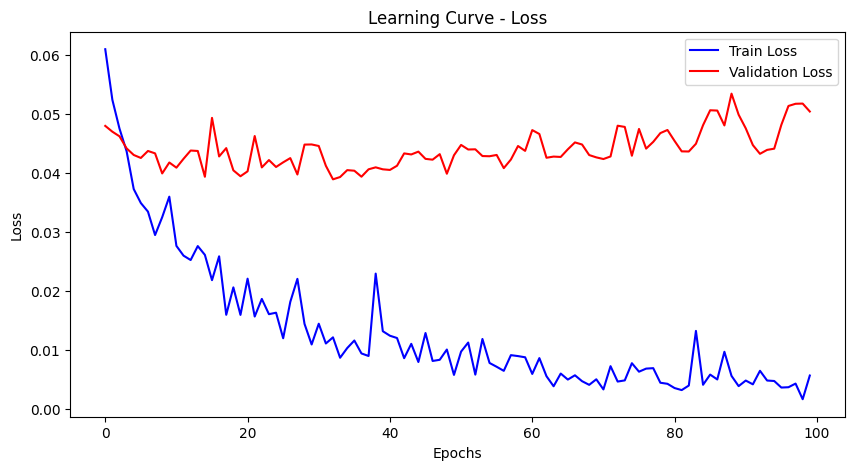

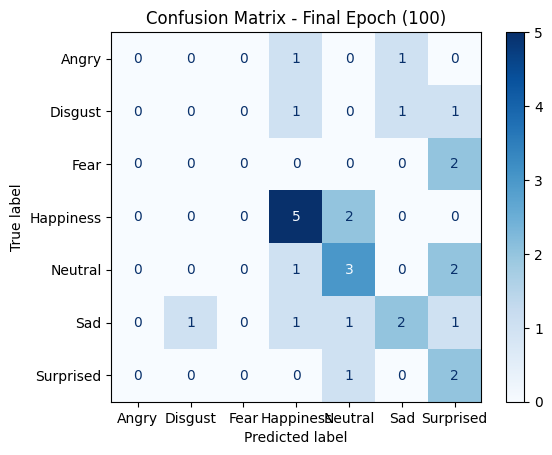

In [21]:
train(num_epochs, train_loader, test_loader, criterion, optimizer, device, writer, model)

In [22]:
# import numpy as np
# import torch
# import torch.nn as nn
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# early stop 

# def train(epochs, train_loader, val_loader, criterion, optimizer, device, writer, model, patience=5):
#     best_accuracy = 0
#     best_val_loss = float('inf')  # Initialize best validation loss to a very high value
#     best_model_wts = model.state_dict()  # To save the best model weights
#     epochs_no_improve = 0  # Counter for epochs with no improvement in validation loss
    
#     train_losses, val_losses = [], []  # For plotting learning curves
#     train_accuracies, val_accuracies = [], []  # For plotting learning curves

#     print("======================== Start Training ======================")
#     for e in range(epochs):
#         model.train()  # Set model to training mode
#         train_loss = 0
#         validation_loss = 0
#         train_correct = 0
#         val_correct = 0
#         train_count = len(train_loader.dataset)
#         val_count = len(val_loader.dataset)

#         # Train the model
#         for data, labels in train_loader:
#             data, labels = data.to(device), labels.to(device)
#             optimizer.zero_grad()
#             output = model(data)
#             loss = criterion(output, labels)
#             loss.backward()
#             optimizer.step()

#             train_loss += loss.item()
#             _, preds = torch.max(output, 1)
#             train_correct += torch.sum(preds == labels.data)

#         # Validate the model
#         model.eval()  # Set model to evaluation mode
#         val_labels_list = []
#         val_preds_list = []
#         with torch.no_grad():  # Disable gradient calculation
#             for data, labels in val_loader:
#                 data, labels = data.to(device), labels.to(device)
#                 val_outputs = model(data)
#                 val_loss = criterion(val_outputs, labels)
#                 validation_loss += val_loss.item()
#                 _, val_preds = torch.max(val_outputs, 1)
#                 val_correct += torch.sum(val_preds == labels.data)

#                 # Collect the true labels and predictions for the confusion matrix
#                 val_labels_list.append(labels.cpu().numpy())  # Move to CPU and convert to numpy
#                 val_preds_list.append(val_preds.cpu().numpy())  # Move to CPU and convert to numpy

#         # Compute average losses and accuracies
#         train_loss = train_loss / train_count
#         train_acc = train_correct.double() / train_count
#         validation_loss = validation_loss / val_count
#         val_acc = val_correct.double() / val_count

#         # Log to TensorBoard
#         writer.add_scalar('Train Loss', train_loss, e)
#         writer.add_scalar('Train Accuracy', train_acc, e)
#         writer.add_scalar('Validation Loss', validation_loss, e)
#         writer.add_scalar('Validation Accuracy', val_acc, e)

#         print(f"Epoch {e+1}/{epochs}: "
#               f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%, "
#               f"Validation Loss: {validation_loss:.4f}, Validation Accuracy: {val_acc*100:.2f}%")

#         # Store values for learning curve plotting
#         train_losses.append(train_loss)
#         val_losses.append(validation_loss)
#         train_accuracies.append(train_acc)
#         val_accuracies.append(val_acc)

#         # Save the best model based on validation loss
#         if validation_loss < best_val_loss:
#             best_val_loss = validation_loss
#             best_model_wts = model.state_dict()  # Save the model weights with the best validation loss
#             epochs_no_improve = 0  # Reset counter if we improve
#         else:
#             epochs_no_improve += 1  # Increment counter if no improvement

#         # Early stopping condition: if no improvement for `patience` epochs, stop training
#         if epochs_no_improve >= patience:
#             print(f"Early stopping after {e+1} epochs due to no improvement in validation loss.")
#             break

#     # Restore the best model weights
#     model.load_state_dict(best_model_wts)

#     # Save the final model after training
#     torch.save(model.state_dict(), 'final_model.pth')

#     # Plot learning curve
#     plt.figure(figsize=(10, 5))
#     plt.plot(range(len(train_losses)), train_losses, label='Train Loss', color='blue')
#     plt.plot(range(len(val_losses)), val_losses, label='Validation Loss', color='red')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.title('Learning Curve - Loss')
#     plt.legend()
#     plt.savefig('learning_curve_loss.png')
#     plt.show()

#     # Compute and plot the confusion matrix for the final epoch
#     val_labels = np.concatenate(val_labels_list)
#     val_preds = np.concatenate(val_preds_list)
#     cm = confusion_matrix(val_labels, val_preds, labels=np.arange(len(np.unique(val_labels))))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_loader.dataset.class_names)
#     disp.plot(cmap='Blues')
#     plt.title(f'Confusion Matrix - Final Epoch')
#     plt.savefig('confusion_matrix_final_epoch.png')  # Save the confusion matrix image for the final epoch
#     plt.show()


In [23]:
# import torch

# # Load the checkpoint
# checkpoint = torch.load('best_checkpoint_model.pth')

# # Inspect the contents of the checkpoint
# checkpoint.keys() # This will show you the keys inside the checkpoint

/tmp/ipykernel_36412/3474434475.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('best_checkpoint_model.pth')


odict_keys(['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.0.conv3.weight', 'layer1.0.bn3.weight', 'layer1.0.bn3.bias', 'layer1.0.bn3.running_mean', 'layer1.0.bn3.running_var', 'layer1.0.bn3.num_batches_tracked', 'layer1.0.downsample.0.weight', 'layer1.0.downsample.1.weight', 'layer1.0.downsample.1.bias', 'layer1.0.downsample.1.running_mean', 'layer1.0.downsample.1.running_var', 'layer1.0.downsample.1.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.we

In [24]:
class TestDataset(Dataset):
    def __init__(self, data_path, transform=None):
        """
        Args:
            data_path (str): Path to the dataset (train or test).
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.data_path = data_path
        self.transform = transform

        # Get all class subfolders (e.g., 'Angry', 'Disgust', etc.)
        self.class_names = sorted(os.listdir(data_path))  # Assumes class names are folder names
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(self.class_names)}

        # Get image file paths along with corresponding labels
        self.image_paths = []
        self.labels = []

        for class_name in self.class_names:
            class_folder = os.path.join(data_path, class_name)
            if os.path.isdir(class_folder):
                for fname in os.listdir(class_folder):
                    if fname.endswith('.jpg'):
                        self.image_paths.append(os.path.join(class_folder, fname))
                        self.labels.append(self.class_to_idx[class_name])

    def __len__(self):
        # Return the number of images in the dataset
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load an image
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')

        # Get the label (index of the class)
        label = self.labels[idx]

        # Apply the transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label

In [25]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])

In [26]:
test_path = 'Dataset/ChildData/OUTPUTFOLDER/Test/'

In [27]:
test_dataset = TestDataset(data_path=test_path, transform=transform)

In [28]:
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [29]:
next(iter(test_loader))[0].shape, next(iter(test_loader))[1].shape

(torch.Size([29, 3, 224, 224]), torch.Size([29]))

In [30]:
next(iter(test_loader))[0][0]

tensor([[[1.1015, 1.1015, 1.1015,  ..., 0.9474, 0.9303, 0.9303],
         [1.1015, 1.1015, 1.1015,  ..., 0.9303, 0.9303, 0.9303],
         [1.0844, 1.0844, 1.1015,  ..., 0.9303, 0.9303, 0.9303],
         ...,
         [0.9303, 0.9303, 0.9303,  ..., 1.2557, 1.2728, 1.2385],
         [1.0159, 1.0159, 1.0502,  ..., 1.2385, 1.2557, 1.2557],
         [1.0673, 1.1015, 1.1187,  ..., 1.2557, 1.2728, 1.3070]],

        [[1.1681, 1.1681, 1.1681,  ..., 1.0105, 0.9930, 0.9930],
         [1.1681, 1.1681, 1.1681,  ..., 0.9930, 0.9930, 0.9930],
         [1.1506, 1.1506, 1.1681,  ..., 0.9930, 0.9930, 0.9930],
         ...,
         [0.9055, 0.9055, 0.9055,  ..., 1.2206, 1.2381, 1.2031],
         [0.9755, 0.9755, 1.0105,  ..., 1.2031, 1.2206, 1.2206],
         [1.0280, 1.0630, 1.0805,  ..., 1.2206, 1.2381, 1.2731]],

        [[1.5071, 1.5071, 1.5071,  ..., 1.3502, 1.3328, 1.3328],
         [1.5071, 1.5071, 1.5071,  ..., 1.3328, 1.3328, 1.3328],
         [1.4897, 1.4897, 1.5071,  ..., 1.3328, 1.3328, 1.

torch.Size([3, 224, 224])


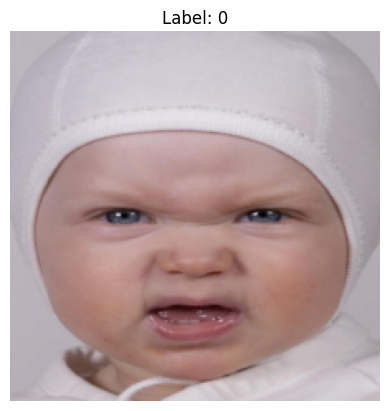

In [31]:
image_tensor, label = test_dataset[0][0].shape, test_dataset[0][1]

import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Assuming train_dataset[0][0] is the image tensor
image_tensor = test_dataset[0][0]  # Get the first image tensor from the dataset
label = test_dataset[0][1]  # Get the label for the first image

# Check the shape of the tensor to make sure it's [C, H, W]
print(image_tensor.shape)

# If your transform used normalization, reverse it like this:
mean = [0.485, 0.456, 0.406]  # Example for ImageNet
std = [0.229, 0.224, 0.225]

# Reverse the normalization
denormalize = transforms.Normalize(mean=[-m/s for m, s in zip(mean, std)], std=[1/s for s in std])
image_tensor = denormalize(image_tensor)

# Convert the tensor to a PIL Image
to_pil = ToPILImage()
image = to_pil(image_tensor)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes for clarity
plt.show()

/tmp/ipykernel_36412/3354435389.py:41: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('final_model.pth'))


Accuracy: 41.38%


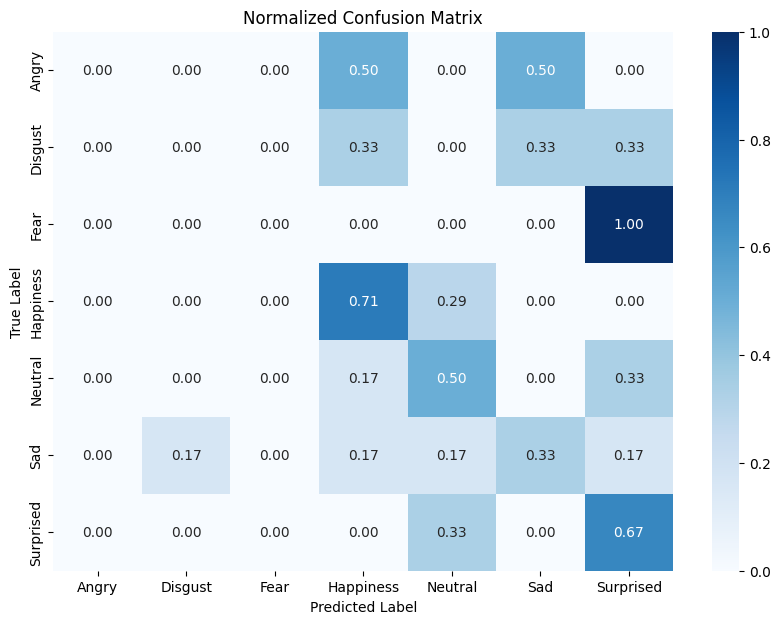

In [32]:
import seaborn as sns
# Evaluate the model and calculate accuracy and confusion matrix
def evaluate_and_print_results(test_loader, model, device, class_names):
    model.eval()  # Set model to evaluation mode

    all_preds = []
    all_labels = []

    # Iterate through the test_loader to run inference
    with torch.no_grad():
        for data, labels in test_loader:
            data = data.to(device)  # Move data to the appropriate device (e.g., 'cuda' or 'cpu')
            labels = labels.to(device)

            outputs = model(data)  # Forward pass to get predictions
            _, predicted_classes = torch.max(outputs, 1)

            all_preds.extend(predicted_classes.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = np.mean(np.array(all_preds) == np.array(all_labels))
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Generate confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row (true label)

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
class_names = ['Angry', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sad', 'Surprised']  # Example class names
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available, else CPU

model.load_state_dict(torch.load('final_model.pth'))
# Run the function to print results
evaluate_and_print_results(test_loader, model, device, class_names)

In [33]:
next(iter(test_loader))[0][0]

tensor([[[1.1015, 1.1015, 1.1015,  ..., 0.9474, 0.9303, 0.9303],
         [1.1015, 1.1015, 1.1015,  ..., 0.9303, 0.9303, 0.9303],
         [1.0844, 1.0844, 1.1015,  ..., 0.9303, 0.9303, 0.9303],
         ...,
         [0.9303, 0.9303, 0.9303,  ..., 1.2557, 1.2728, 1.2385],
         [1.0159, 1.0159, 1.0502,  ..., 1.2385, 1.2557, 1.2557],
         [1.0673, 1.1015, 1.1187,  ..., 1.2557, 1.2728, 1.3070]],

        [[1.1681, 1.1681, 1.1681,  ..., 1.0105, 0.9930, 0.9930],
         [1.1681, 1.1681, 1.1681,  ..., 0.9930, 0.9930, 0.9930],
         [1.1506, 1.1506, 1.1681,  ..., 0.9930, 0.9930, 0.9930],
         ...,
         [0.9055, 0.9055, 0.9055,  ..., 1.2206, 1.2381, 1.2031],
         [0.9755, 0.9755, 1.0105,  ..., 1.2031, 1.2206, 1.2206],
         [1.0280, 1.0630, 1.0805,  ..., 1.2206, 1.2381, 1.2731]],

        [[1.5071, 1.5071, 1.5071,  ..., 1.3502, 1.3328, 1.3328],
         [1.5071, 1.5071, 1.5071,  ..., 1.3328, 1.3328, 1.3328],
         [1.4897, 1.4897, 1.5071,  ..., 1.3328, 1.3328, 1.

torch.Size([3, 224, 224])


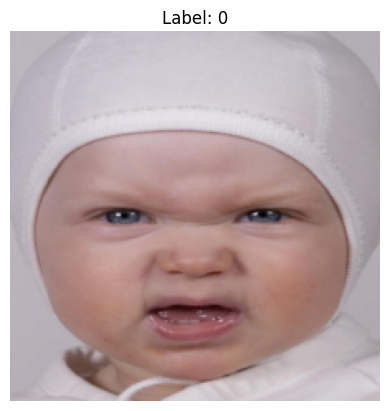

In [34]:
image_tensor, label = test_dataset[0][0].shape, test_dataset[0][1]

import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage

# Assuming train_dataset[0][0] is the image tensor
image_tensor = test_dataset[0][0]  # Get the first image tensor from the dataset
label = test_dataset[0][1]  # Get the label for the first image

# Check the shape of the tensor to make sure it's [C, H, W]
print(image_tensor.shape)

# If your transform used normalization, reverse it like this:
mean = [0.485, 0.456, 0.406]  # Example for ImageNet
std = [0.229, 0.224, 0.225]

# Reverse the normalization
denormalize = transforms.Normalize(mean=[-m/s for m, s in zip(mean, std)], std=[1/s for s in std])
image_tensor = denormalize(image_tensor)

# Convert the tensor to a PIL Image
to_pil = ToPILImage()
image = to_pil(image_tensor)

# Display the image using matplotlib
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes for clarity
plt.show()

In [35]:
test_train_dataset = 'Dataset/ChildData/OUTPUTFOLDER/Train/'
test_test_dataset = 'Dataset/ChildData/OUTPUTFOLDER/Test/'

/tmp/ipykernel_36412/3636946613.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('final_model.pth'))


======================== Start Training ======================
Epoch 1/100: Train Loss: 0.0228, Train Accuracy: 90.10%
Epoch 2/100: Train Loss: 0.0161, Train Accuracy: 97.03%
Epoch 3/100: Train Loss: 0.0218, Train Accuracy: 91.09%
Epoch 4/100: Train Loss: 0.0156, Train Accuracy: 98.02%
Epoch 5/100: Train Loss: 0.0120, Train Accuracy: 98.02%
Epoch 6/100: Train Loss: 0.0142, Train Accuracy: 95.05%
Epoch 7/100: Train Loss: 0.0177, Train Accuracy: 93.07%
Epoch 8/100: Train Loss: 0.0125, Train Accuracy: 99.01%
Epoch 9/100: Train Loss: 0.0123, Train Accuracy: 98.02%
Epoch 10/100: Train Loss: 0.0110, Train Accuracy: 99.01%
Epoch 11/100: Train Loss: 0.0133, Train Accuracy: 100.00%
Epoch 12/100: Train Loss: 0.0178, Train Accuracy: 99.01%
Epoch 13/100: Train Loss: 0.0173, Train Accuracy: 92.08%
Epoch 14/100: Train Loss: 0.0194, Train Accuracy: 95.05%
Epoch 15/100: Train Loss: 0.0151, Train Accuracy: 98.02%
Epoch 16/100: Train Loss: 0.0182, Train Accuracy: 92.08%
Epoch 17/100: Train Loss: 0.0115,

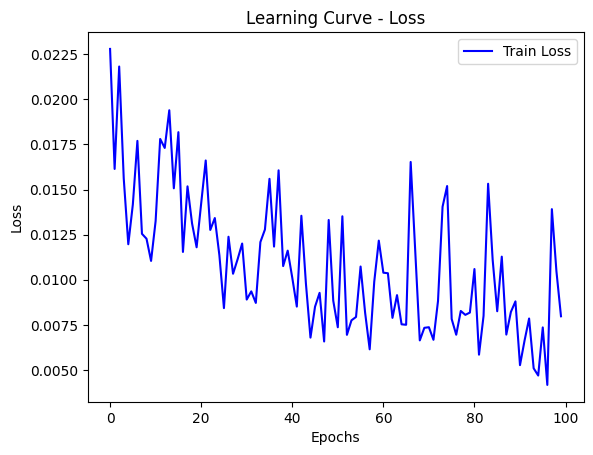

Test Accuracy: 34.48%


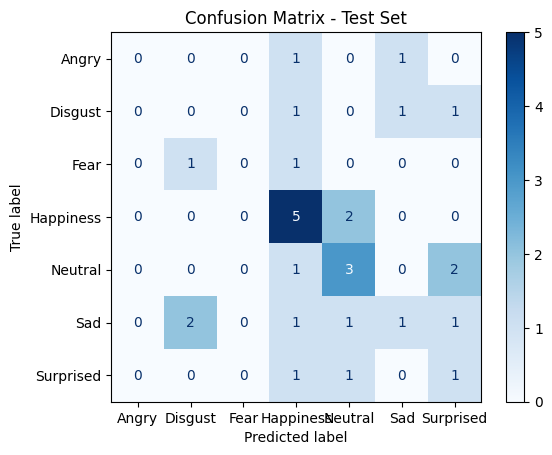

In [36]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from torchvision import transforms
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])

# Create your training dataset and DataLoader
train_dataset = CustomDataset(data_path=test_train_dataset, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Load the pretrained model
# model = YourModel()  # Replace with your actual model class
model.load_state_dict(torch.load('final_model.pth'))
model.to(device)

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize TensorBoard (optional)
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir="runs/your_experiment_name")

# Train the model (train only, no validation)
epochs = 100
train_losses = []

print("======================== Start Training ======================")
for e in range(epochs):
    model.train()  # Set model to training mode
    train_loss = 0
    train_correct = 0
    train_count = len(train_loader.dataset)

    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(output, 1)
        train_correct += torch.sum(preds == labels.data)

    # Compute average loss and accuracy
    train_loss = train_loss / train_count
    train_acc = train_correct.double() / train_count

    # Log to TensorBoard
    writer.add_scalar('Train Loss', train_loss, e)
    writer.add_scalar('Train Accuracy', train_acc, e)

    print(f"Epoch {e+1}/{epochs}: "
          f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc*100:.2f}%")

    train_losses.append(train_loss)

# Save the final model after training
torch.save(model.state_dict(), 'final_model.pth')

# Plot learning curve (optional)
plt.plot(range(epochs), train_losses, label='Train Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve - Loss')
plt.legend()
plt.savefig('learning_curve_loss.png')
plt.show()

# Now, evaluate the model on the test dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), 
])


# Load the test dataset and DataLoader
test_dataset = CustomDataset(data_path=test_test_dataset, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Evaluate on the test dataset
model.eval()  # Set the model to evaluation mode
test_labels_list = []
test_preds_list = []

with torch.no_grad():  # Disable gradient calculation
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model(data)
        _, preds = torch.max(outputs, 1)

        test_labels_list.append(labels.cpu().numpy())
        test_preds_list.append(preds.cpu().numpy())

# Concatenate all labels and predictions to compute accuracy and confusion matrix
test_labels = np.concatenate(test_labels_list)
test_preds = np.concatenate(test_preds_list)

# Compute accuracy
test_accuracy = accuracy_score(test_labels, test_preds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Compute confusion matrix (optional)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels, test_preds, labels=np.arange(len(np.unique(test_labels))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_loader.dataset.class_names)
disp.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Test Set')
plt.savefig('confusion_matrix_test_set.png')
plt.show()
